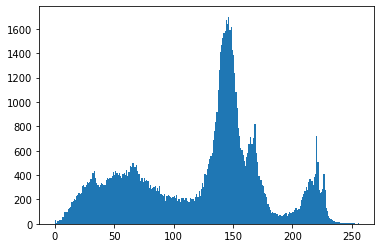

In [2]:
import cv2
from matplotlib import pyplot as plt
# 显示原图的直方图
img = cv2.imread("gray.jpg", 0)
# 将图像转化为一维数组，分为256个箱子，像素取值范围是0-255
plt.hist(img.ravel(), 256, [0, 256])
#plt.savefig("histogram.jpg", dpi = 300, bbox_inches = "tight", pad_inches = 0)
plt.show()

[  34    8   24   27   29   32   55   52  100   94   97  125  133  136
  178  184  205  199  231  233  255  245  253  307  322  301  315  343
  333  343  366  415  413  435  377  333  320  304  317  333  324  319
  317  363  374  370  377  379  391  427  403  433  417  402  417  394
  372  405  413  401  438  396  428  475  470  502  498  466  482  432
  408  411  351  374  346  373  350  361  348  293  318  287  293  306
  311  272  296  268  313  248  240  225  244  188  229  238  226  219
  208  220  227  212  239  190  200  179  208  215  213  195  208  183
  177  180  213  200  202  186  222  246  216  273  230  287  335  304
  405  401  447  487  531  555  577  690  761  834  921 1095 1259 1412
 1466 1525 1568 1581 1672 1640 1699 1587 1618 1422 1386 1235 1081  952
  789  718  619  602  565  518  476  547  581  658  716  657  651  704
  820  583  506  390  396  358  321  309  251  245  222  163  137  117
   90   96   86   89   78   77   63   72   68   60   75   79   86   68
   84 

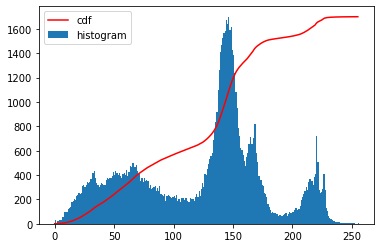

In [5]:
import numpy as np
img = cv2.imread("gray.jpg", 0)
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
print(hist)
cdf = np.cumsum(hist)   #计算累积分布函数值
cdf_normalized = cdf * max(hist) / max(cdf)
print(cdf_normalized)
plt.plot(cdf_normalized, color = "r")
plt.hist(img.ravel(), 256, [0, 256])
plt.legend(("cdf", "histogram"), loc = "upper left")
plt.show()

[[9.67111140e-02]
 [1.19466670e-01]
 [1.87733337e-01]
 [2.64533341e-01]
 [3.47022235e-01]
 [4.38044459e-01]
 [5.94488919e-01]
 [7.42400050e-01]
 [1.02684450e+00]
 [1.29422224e+00]
 [1.57013333e+00]
 [1.92568886e+00]
 [2.30399990e+00]
 [2.69084430e+00]
 [3.19715548e+00]
 [3.72053337e+00]
 [4.30364466e+00]
 [4.86968899e+00]
 [5.52675581e+00]
 [6.18951130e+00]
 [6.91484451e+00]
 [7.61173344e+00]
 [8.33137798e+00]
 [9.20462227e+00]
 [1.01205330e+01]
 [1.09767113e+01]
 [1.18727112e+01]
 [1.28483553e+01]
 [1.37955551e+01]
 [1.47711992e+01]
 [1.58122654e+01]
 [1.69927101e+01]
 [1.81674652e+01]
 [1.94047985e+01]
 [2.04771538e+01]
 [2.14243546e+01]
 [2.23345776e+01]
 [2.31992893e+01]
 [2.41009789e+01]
 [2.50481796e+01]
 [2.59697800e+01]
 [2.68771572e+01]
 [2.77788467e+01]
 [2.88113804e+01]
 [2.98752022e+01]
 [3.09276466e+01]
 [3.20000038e+01]
 [3.30780487e+01]
 [3.41902275e+01]
 [3.54048042e+01]
 [3.65511169e+01]
 [3.77827606e+01]
 [3.89688950e+01]
 [4.01123619e+01]
 [4.12984962e+01]
 [4.241920

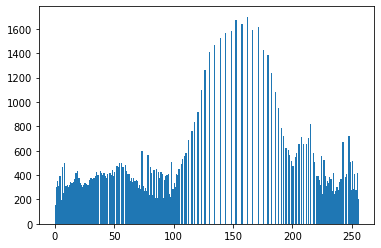

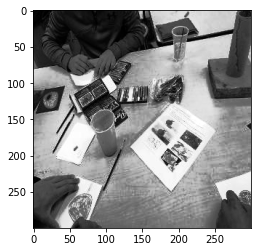

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = "gray.jpg"
# 直方图均衡化函数,输入图片
def def_equalizehist(img):
    # 灰度级
    L=256
    # 以灰度图像的方式读入图片
    img = cv2.imread(img, 0)
    h, w = img.shape
    # 计算图像的直方图，即存在的每个灰度值的像素点数量
    hist = cv2.calcHist([img], [0], None, [256], [0, 255])
    # 计算灰度值的像素点的概率，除以所有像素点个数，即归一化
    hist[0:255] = hist[0:255] / (h * w)
    # 设置累计分布函数Si
    sum_hist = np.zeros(hist.shape)
    # 开始计算Si的一部分值，注意i每增大，Si都是对前i个灰度值的分布概率进行累加
    for i in range(256):
        sum_hist[i] = sum(hist[0:i + 1])
    equal_hist = np.zeros(sum_hist.shape)
    # 进行取整扩展
    for i in range(256):
        equal_hist[i] = int(((L - 1) - 0) * sum_hist[i] + 0.5)
    equal_img = img.copy()
    # 新图片的创建
    for i in range(h):
        for j in range(w):
            equal_img[i, j] = equal_hist[img[i, j]]

    equal_hist = cv2.calcHist([equal_img], [0], None, [256], [0, 256])
    equal_hist[0:255] = equal_hist[0:255] / (h * w)
    plt.hist(equal_img.ravel(), 256, [0, 256])
    plt.show()
    return equal_img

img2=def_equalizehist(img)
plt.imshow(img2,cmap="gray")
plt.savefig("histogram.jpg", dpi = 300, bbox_inches = "tight", pad_inches = 0)